In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (!code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Нажмите, чтобы показать/скрыть код"></form>''')


# Постановка задачи

Уравнения возмущенного движения некоторой материальной системы имеют вид:

\begin{equation}
\dot{x}=-ay-x(x^{2k}+y^{2k}),\;\; \dot{y}=ax-y(x^{2k}+y^{2k}),\;\; k \in{N}.
\end{equation}


Доказать асимптотическую устойчивость невозмущенного движения.

# Решение

Для доказательства возьмём следующую функцию Ляпунова:

\begin{equation}
\varphi=x^2+y^2
\end{equation}

Подключим соответствующие библиотеки и символьно вычислим производную взятой нами  функции Ляпунова:

In [2]:
from sympy import *
init_printing()

In [3]:
t = Symbol('t')
a = Symbol('a')
k = Symbol('k')
x = Function('x')
y = Function('y')
φ = Function('φ')

V_x = -a*y(t) - x(t)*(x(t)**(2*k) + y(t)**(2*k))
V_y = a*x(t) - y(t)*(x(t)**(2*k) + y(t)**(2*k))

φ = x(t)**2 + y(t)**2
Lyapunov_diff = diff(φ,t)
factor(Lyapunov_diff.subs({diff(x(t),t):V_x, diff(y(t),t):V_y}))

То есть, мы получили следующее выражение:

\begin{equation}
\dot{\varphi}
=-2(x^2+y^2)(x^{2k}+y^{2k})
\end{equation}

В $\overset{\circ}{U_{\varepsilon}}$ : 

$\varphi \gt 0$

$\dot{\varphi} \lt 0$

По Теореме Ляпунова, невозмущенное движение асимптотически устойчиво.


# Визуализация

Визуализируем тот факт, что функция Ляпунова положительна в окрестности нуля:

In [4]:
import numpy as np
from scipy import linalg
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.animation as animation

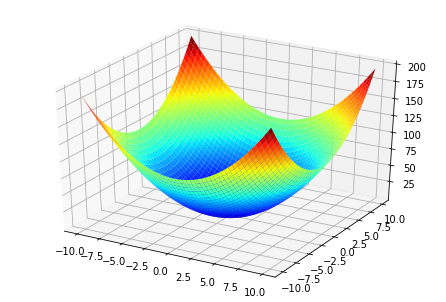

In [5]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import numpy

def makeData ():
    x = numpy.arange (-10, 10, 0.1)
    y = numpy.arange (-10, 10, 0.1)
    xgrid, ygrid = numpy.meshgrid(x, y)

    zgrid = xgrid ** 2 + ygrid **2 
    return xgrid, ygrid, zgrid
def plot_func():
    
    x, y, z = makeData()

    fig = pylab.figure()
    axes = Axes3D(fig)

    axes.plot_surface(x, y, z, rstride=4, cstride=4, cmap = cm.jet)

    pylab.show()
plot_func()

Визуализируем так же производную данной функции  $\dot{\varphi}$:

In [6]:
def makeData (k):
    x = numpy.arange (-10, 10, 0.1)
    y = numpy.arange (-10, 10, 0.1)
    xgrid, ygrid = numpy.meshgrid(x, y)

    zgrid = -2*(xgrid ** 2 + ygrid **2)*(xgrid ** (2* k) + ygrid ** (2* k)) 
    return xgrid, ygrid, zgrid

def plot_func(k):
    
    x, y, z = makeData(k)

    fig = pylab.figure()
    axes = Axes3D(fig)

    axes.plot_surface(x, y, z, rstride=4, cstride=4, cmap = cm.jet)

    pylab.show()

interact(plot_func, k = (1,10));

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

Как мы и ожидали, она не принимает положительных значений.

Так как исходная система дифференциальных уравнений в общем виде не решается, изобразим движение точки численным методом, взяв начальные условия $x = 1$, $y = 1$, $k = 1$, $a = 1$:



In [7]:
iterations = 50000

def calculate_position(start_pos, k, a, dt):
    x_0, y_0, t_0 = start_pos[0], start_pos[1], start_pos[2]
    x = x_0 + (-a*y_0 - x_0*(x_0**(2*k) + y_0**(2*k))) * dt
    y = y_0 + (a*x_0 - y_0*(x_0**(2*k) + y_0**(2*k))) * dt
    t = t_0 + dt
    return (x, y, t)

def plot_tr(x, y, k, a):
    t = 0
    start_pos = (x, y, t)
    dt = 0.001
    
    position = [start_pos]
    for i in range(iterations):
        position.append(calculate_position(position[-1], k, a, dt))
    
    pos_x = [u[0] for u in position]
    pos_y = [u[1] for u in position]
    pos_t = [u[2] for u in position]
    fig1 = plt.figure()
    fig2 = plt.figure()
    axes1 = Axes3D(fig1)
    axes1.set_xlabel('x')
    axes1.set_ylabel('y')
    axes1.set_zlabel('t')
    axes1.plot(pos_x, pos_y, pos_t)
    
    axes2 = fig2.add_subplot(2, 2, 1)
    axes2.set_xlabel('x')
    axes2.set_ylabel('t')

    axes3 = fig2.add_subplot(2, 2, 2)
    axes3.set_xlabel('y')
    axes3.set_ylabel('t')

    axes2.plot(pos_x, pos_t)
    axes3.plot(pos_y, pos_t)
    pylab.show()





<IPython.core.display.Javascript object>


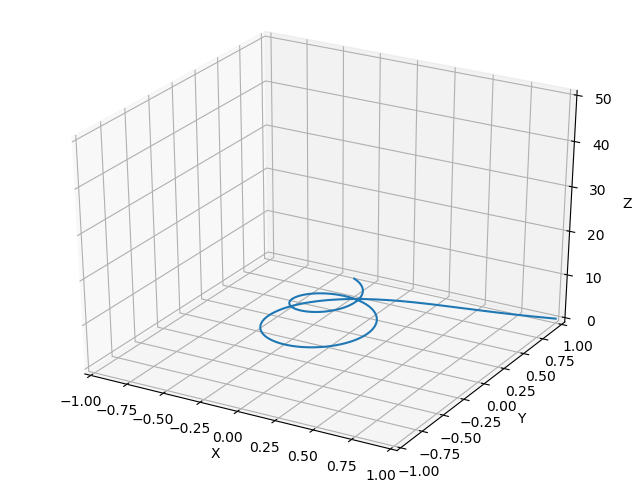

In [13]:
%matplotlib notebook
def calculate_position(start_pos, k, a, dt):
    x_0, y_0, t_0 = start_pos[0], start_pos[1], start_pos[2]
    x = x_0 + (-a*y_0 - x_0*(x_0**(2*k) + y_0**(2*k))) * dt
    y = y_0 + (a*x_0 - y_0*(x_0**(2*k) + y_0**(2*k))) * dt
    t = t_0 + dt
    return (x, y, t)

#########################
t = 0
dt = 0.001
x = 1
y = 1
a = 1
k = 1
start_pos = (x, y, t)
position = [start_pos]

for i in range(iterations):
    position.append(calculate_position(position[-1], k, a, dt))

pos_x = [u[0] for u in position]
pos_y = [u[1] for u in position]
pos_t = [u[2] for u in position]
#########################

def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines


fig = plt.figure()
ax = Axes3D(fig)





pos_x_anim = [pos_x[i] for i in range(0, iterations, 16)]
pos_y_anim = [pos_y[i] for i in range(0, iterations, 16)]
pos_t_anim = [pos_t[i] for i in range(0, iterations, 16)]


data = np.array([[np.array(pos_x_anim),np.array(pos_y_anim),np.array(pos_t_anim)]])


lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

ax.set_xlim3d([-1, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, iterations*dt])
ax.set_zlabel('Z')


line_ani = animation.FuncAnimation(fig, update_lines, len(pos_x_anim), fargs=(data, lines),
                                   interval=1, blit=True, repeat = True)

plt.show()

In [10]:
interact(plot_tr, x = (-10, 10), y = (-10, 10), k = (0, 10), a = (-10, 10, 0.5));

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

Частный случай про $a = 0$:

<IPython.core.display.Javascript object>


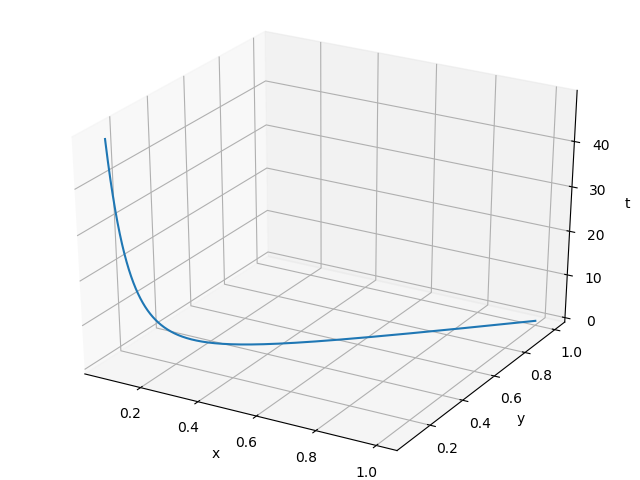

<IPython.core.display.Javascript object>


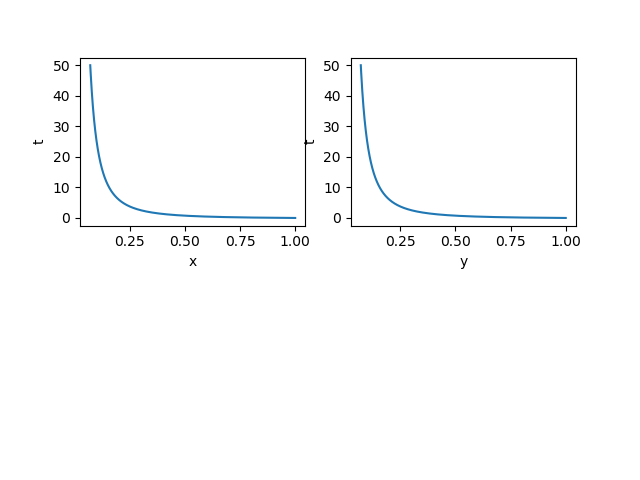

In [11]:
plot_tr(x = 1,y = 1,k = 1, a = 0)